In [1]:
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 30
MEDIUM_SIZE = 35
BIGGER_SIZE = 45

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams.update({'font.size': 22})

## Constants

In [2]:
n_2 = 1.332 # water refractive index
c = 3*10**8 #speed of light m/s
m = 1.195 # n_1/n_2
k = 1.221*10**7 #wavevector
a = 100*10**-9 # particle radius
P = 0.1 # beam power
w_0 = 5*10**-6 # beam waist

## Scattering and Gradient Force expressions

In [3]:
def f_scatt(z): #pressure scattering force
    return (n_2/c)*(8*np.pi/3)*(k*a)**4*a**2*((m**2-1)/(m**2+2))**2*(2*P/(np.pi*w_0**2))*(1/(1+(2*z)**2))

def f_grad(z): #pressure gradient force
    return ((-1)*(2*np.pi*n_2*a**3/c)*((m**2-1)/(m**2+2))*(8*z/(k*(w_0)**2))*(1/(1+(2*z)**2))*
(2*P/(np.pi*(w_0)**2))*(1/(1+(2*z)**2)))

## Scattering force plot

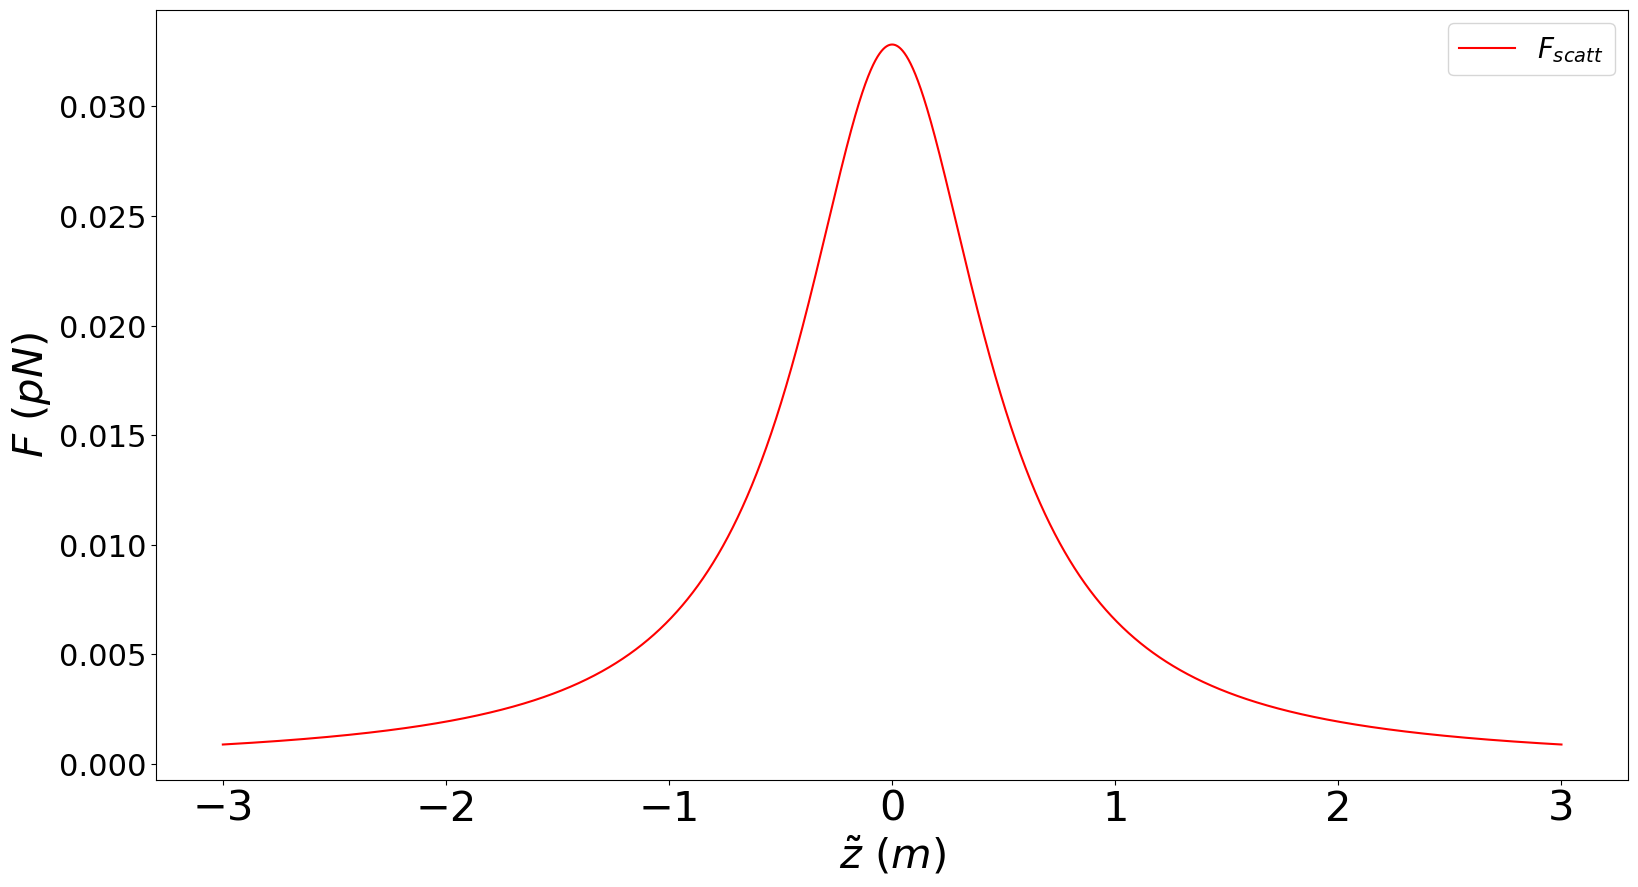

In [4]:
t= np.arange(-3, 3, 10**-4)

plt.figure( figsize=(19,10) )
plt.plot(t, f_scatt(t)*10**12, color = 'r', label = '$F_{scatt}$')
plt.legend(loc='best')
plt.xlabel('$\~{z}\ (m)$')
plt.ylabel('$F\ (pN)$')
plt.savefig('scatt force a=100.jpeg', dpi=300, bbox_inches='tight')

## Gradient force plot

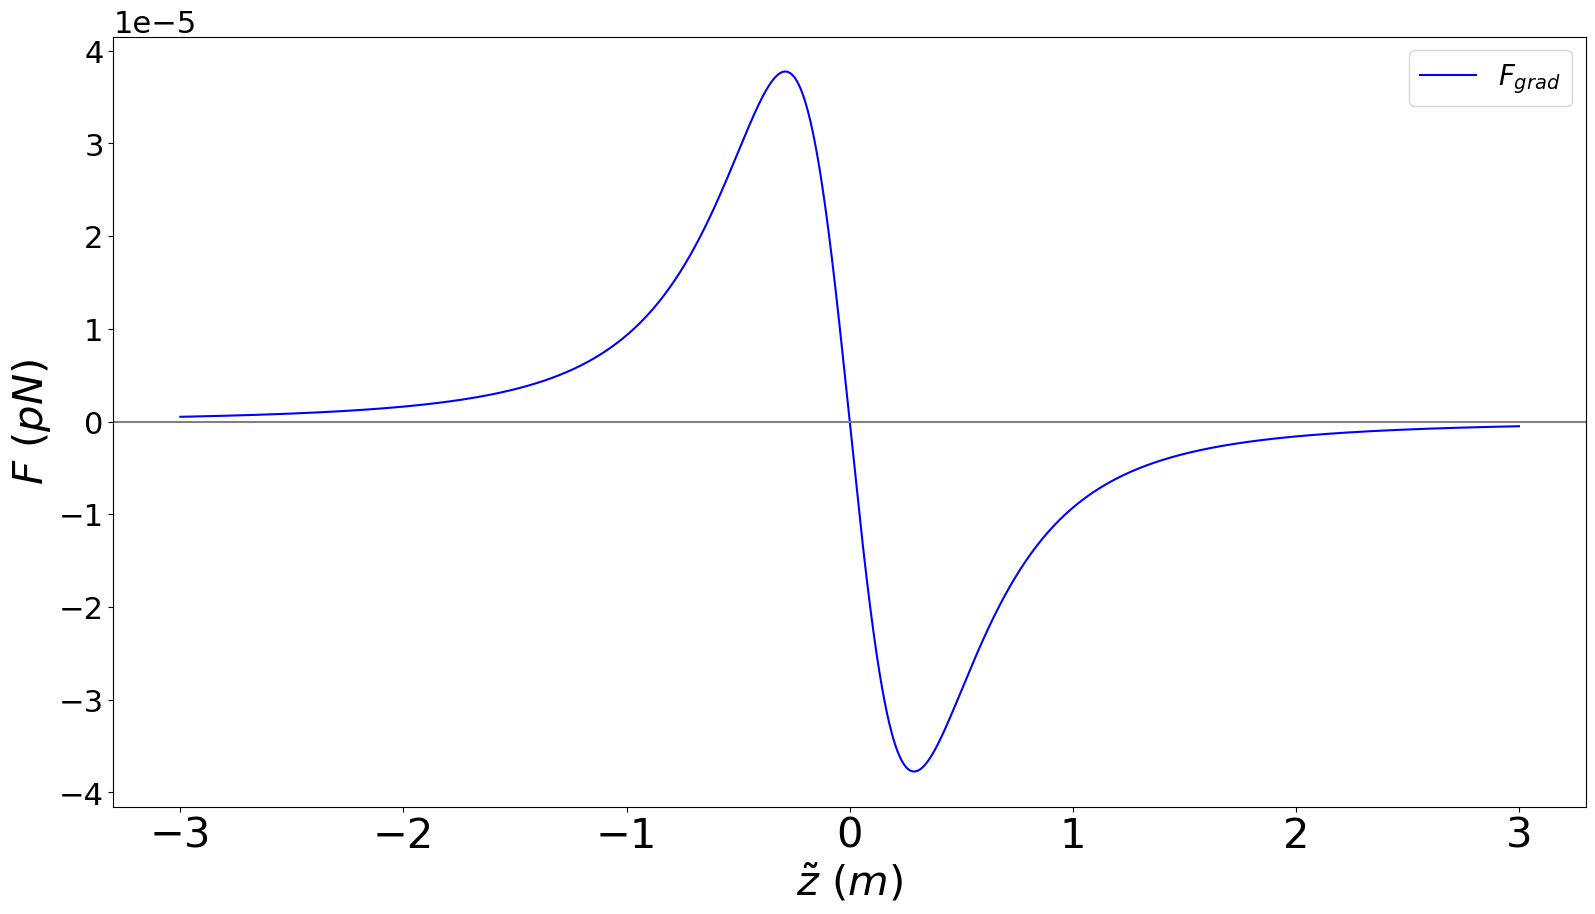

In [13]:
plt.figure( figsize=(19,10) )
plt.plot(t, f_grad(t)*10**12, color = 'b', label = '$F_{grad}$')
plt.axhline(y = 0, c= 'grey',ls ="-")
plt.legend(loc='best')
plt.xlabel('$\~{z}\ (m)$')
plt.ylabel('$F\ (pN)$')
plt.savefig('grad force a=100.jpeg', dpi=300, bbox_inches='tight')

## Stability condition

In [6]:
def equil(z):
    return f_grad(z)+f_scatt(z)

### a=5nm

[0.01767032]


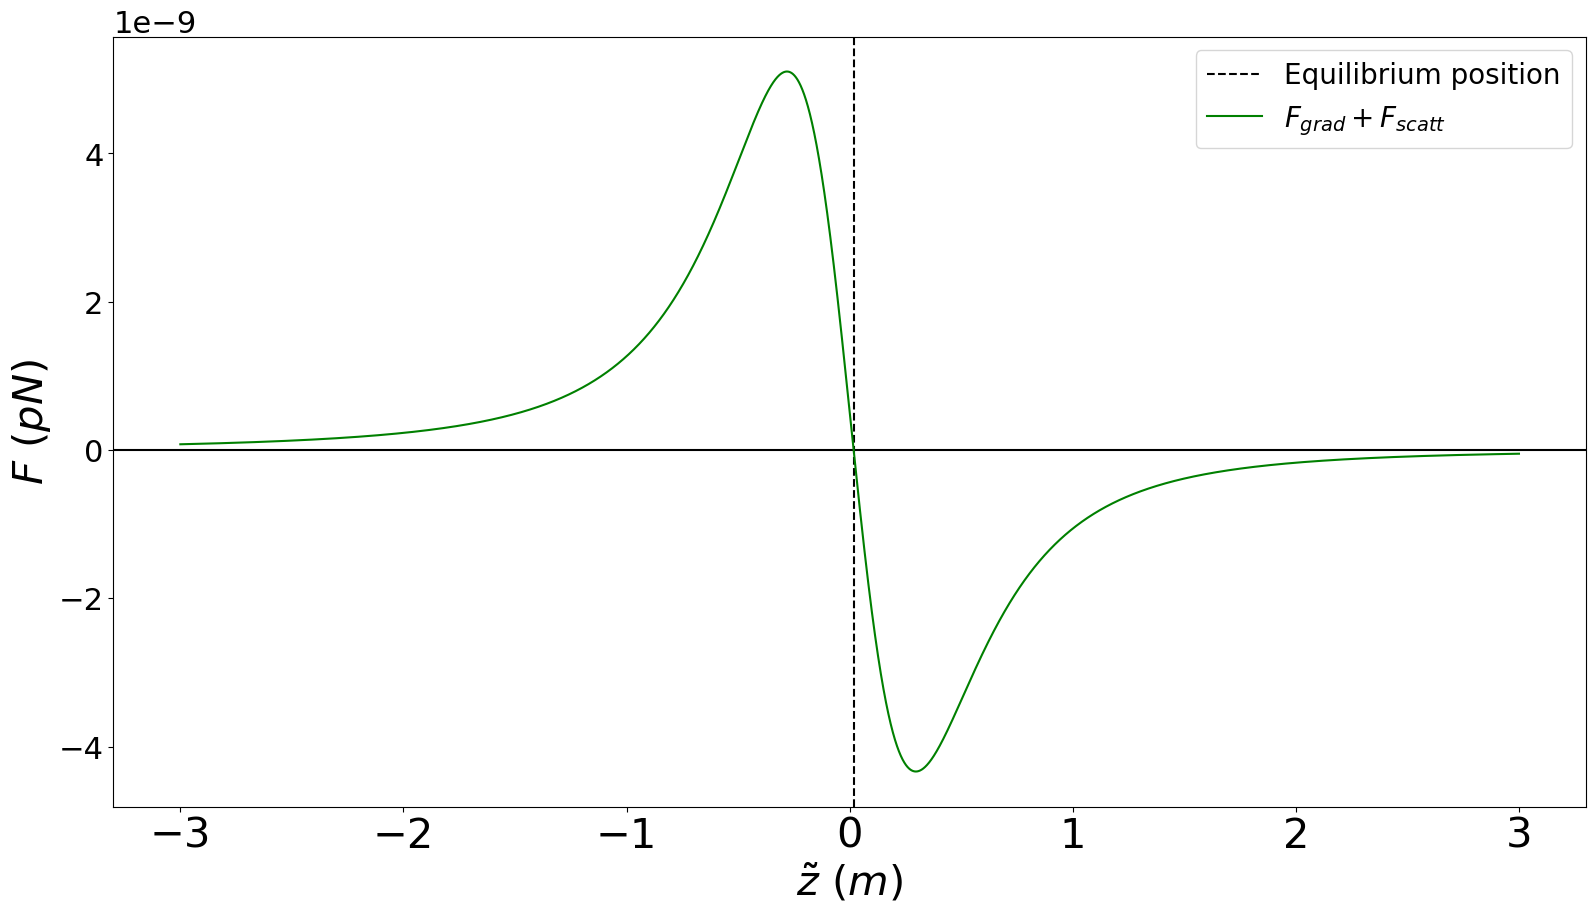

In [7]:
from scipy.optimize import fsolve

a=5*10**-9

t_eq = fsolve(equil, x0=0)
print(t_eq)

plt.figure( figsize=(19,10) )
plt.axvline(x = t_eq, c= 'k',ls ="--", label = 'Equilibrium position')
plt.axhline(y = 0, c= 'k',ls ="-")
#plt.plot(t, f_scatt(t)*10**12, color = 'r', label = '$F_{scatt}$')
#plt.plot(t, f_grad(t)*10**12, color = 'b', label = '$F_{grad}$')
plt.plot(t, equil(t)*10**12, color = 'g', label = '$F_{grad}+F_{scatt}$')
plt.legend(loc = "best")
plt.xlabel('$\~{z}\ (m)$')
plt.ylabel('$F\ (pN)$')
plt.savefig('scatt and grad forces a=5.jpeg', dpi=300, bbox_inches='tight')

### a=10nm

[0.15470208]
[1.61600929]


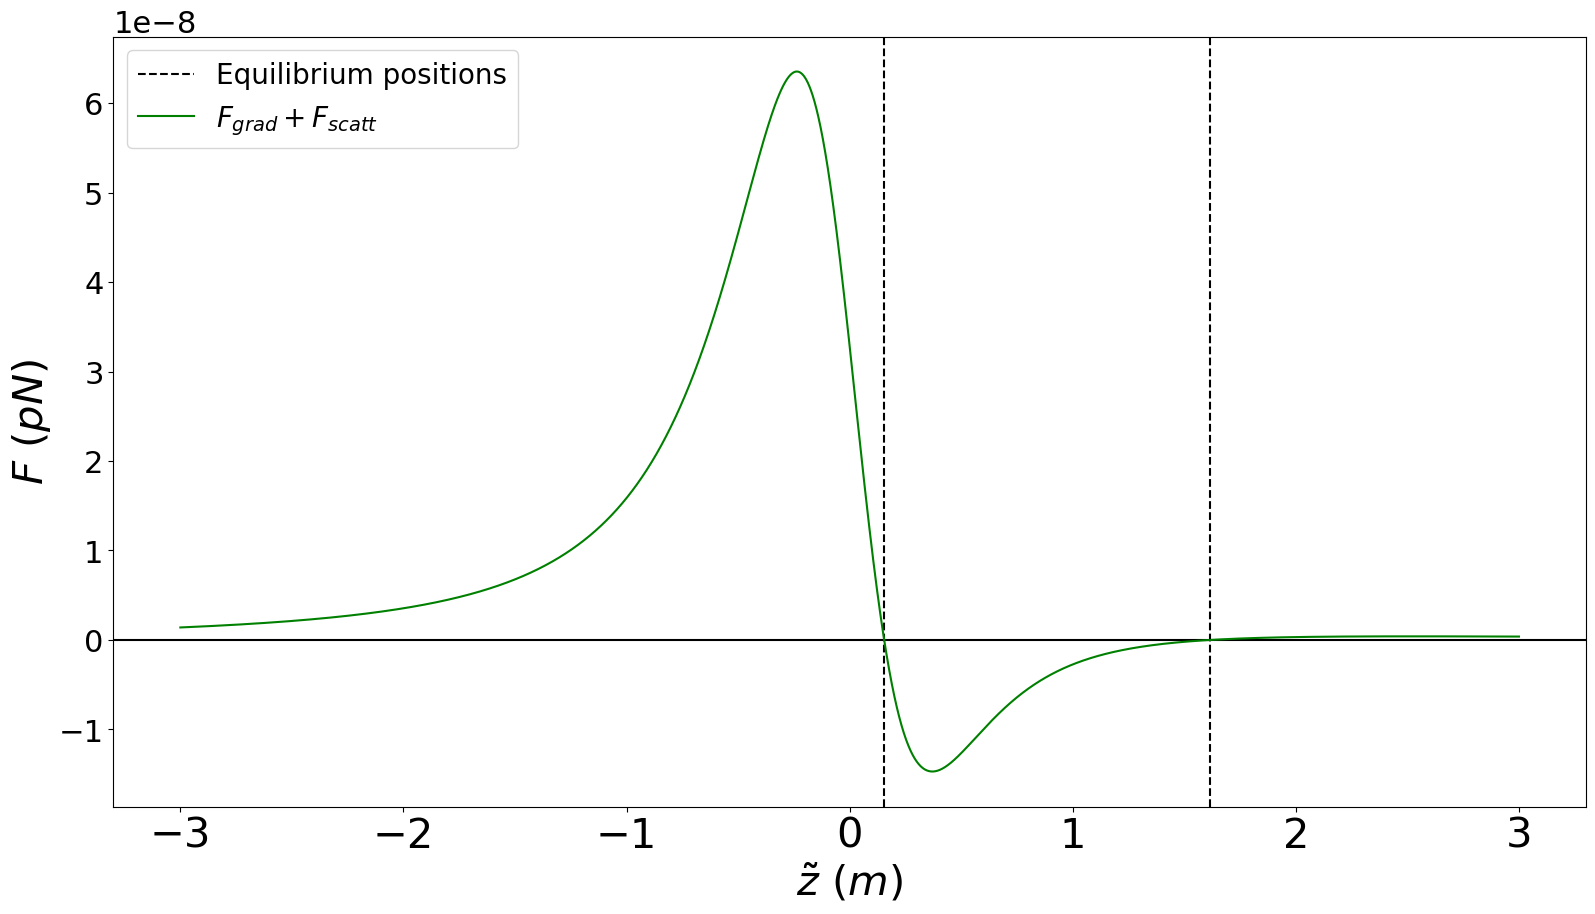

In [8]:
a=10*10**-9

t_eq = fsolve(equil, x0=0)
print(t_eq)

t_eq1 = fsolve(equil, x0=1.5)
print(t_eq1)

plt.figure( figsize=(19,10) )
plt.axvline(x = t_eq, c= 'k',ls ="--", label = 'Equilibrium positions')
plt.axvline(x = t_eq1, c= 'k',ls ="--")
plt.axhline(y = 0, c= 'k',ls ="-")
#plt.plot(t, f_scatt(t)*10**12, color = 'r', label = '$F_{scatt}$')
#plt.plot(t, f_grad(t)*10**12, color = 'b', label = '$F_{grad}$')
plt.plot(t, equil(t)*10**12, color = 'g', label = '$F_{grad}+F_{scatt}$')
plt.legend(loc = "best")
plt.xlabel('$\~{z}\ (m)$')
plt.ylabel('$F\ (pN)$')
plt.savefig('scatt and grad forces a=10.jpeg', dpi=300, bbox_inches='tight')

## a=20nm

C:\Users\eduar\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


[3.71532853e+48]


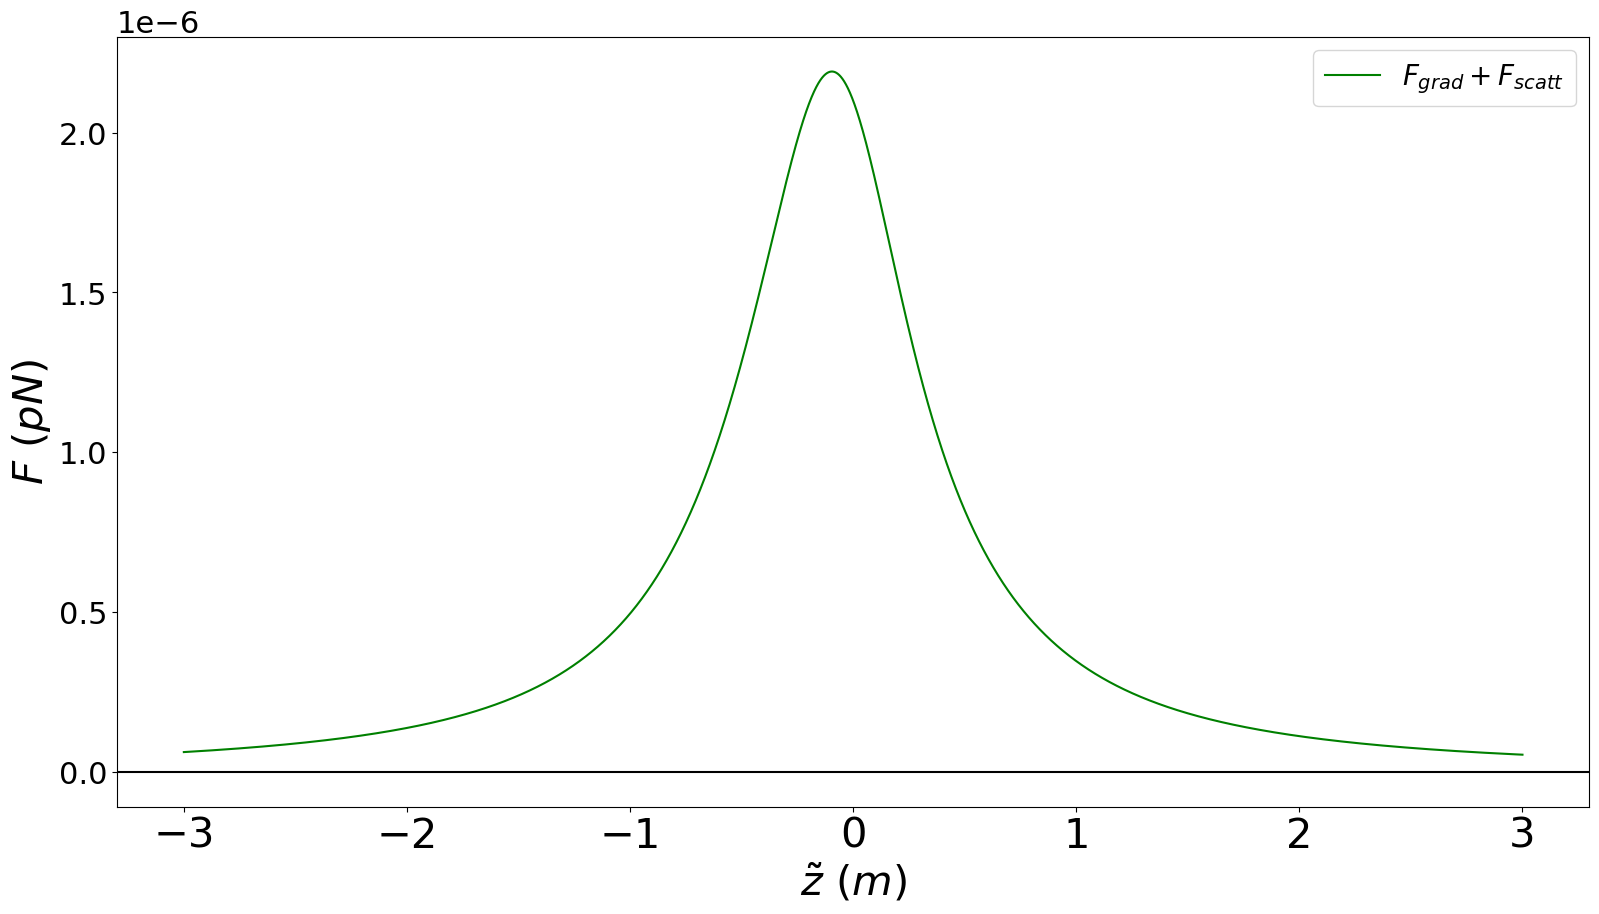

In [9]:
a=20*10**-9

t_eq = fsolve(equil, x0=0)
print(t_eq)

plt.figure( figsize=(19,10) )
#plt.axvline(x = t_eq, c= 'k',ls ="--", label = 'Equilibrium position')
plt.axhline(y = 0, c= 'k',ls ="-")
#plt.plot(t, f_scatt(t)*10**12, color = 'r', label = '$F_{scatt}$')
#plt.plot(t, f_grad(t)*10**12, color = 'b', label = '$F_{grad}$')
plt.plot(t, equil(t)*10**12, color = 'g', label = '$F_{grad}+F_{scatt}$')
plt.legend(loc = "best")
plt.xlabel('$\~{z}\ (m)$')
plt.ylabel('$F\ (pN)$')
plt.savefig('scatt and grad forces a=20.jpeg', dpi=300, bbox_inches='tight')

### a = 100nm

[3.55413648e+50]


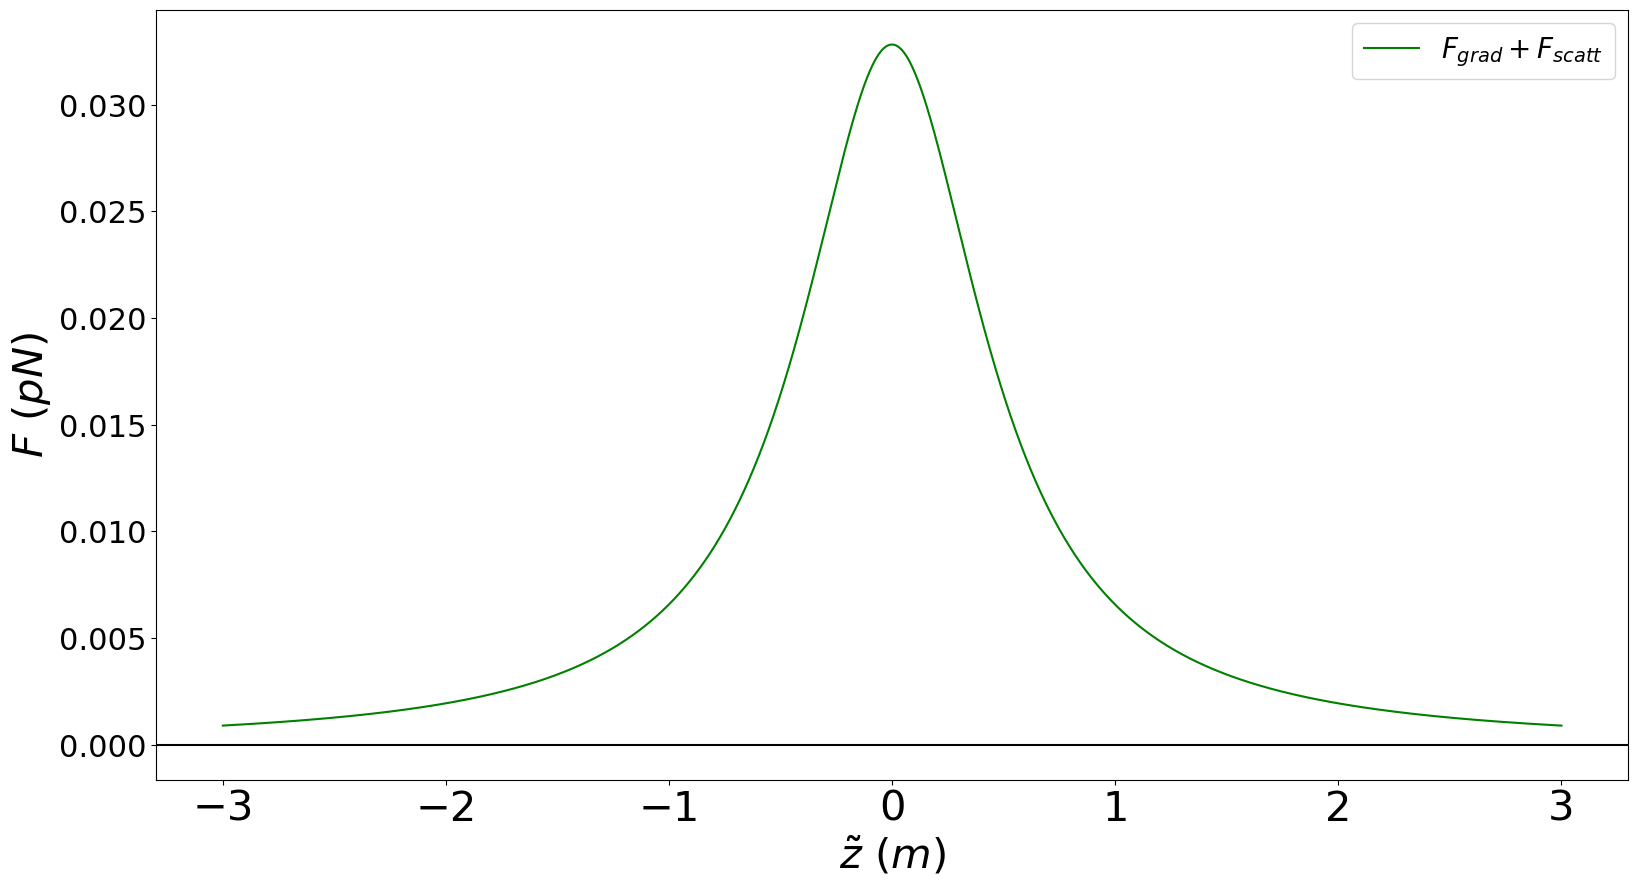

In [10]:
a=100*10**-9

t_eq = fsolve(equil, x0=0)
print(t_eq)

plt.figure( figsize=(19,10) )
#plt.axvline(x = t_eq, c= 'k',ls ="--", label = 'Equilibrium position')
plt.axhline(y = 0, c= 'k',ls ="-")
#plt.plot(t, f_scatt(t)*10**12, color = 'r', label = '$F_{scatt}$')
#plt.plot(t, f_grad(t)*10**12, color = 'b', label = '$F_{grad}$')
plt.plot(t, equil(t)*10**12, color = 'g', label = '$F_{grad}+F_{scatt}$')
plt.legend(loc = "best")
plt.xlabel('$\~{z}\ (m)$')
plt.ylabel('$F\ (pN)$')
plt.savefig('scatt and grad forces a=100.jpeg', dpi=300, bbox_inches='tight')